# Addends, Maxima, and Mixtures

The remaining fun things in Chapter 5

In [9]:
from __future__ import print_function, division

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import sys
import os

tb_dir = "/home/pi/Programming/ThinkBayes2/"

sys.path.append(os.path.abspath(tb_dir + "thinkbayes2/"))
sys.path.append(os.path.abspath(tb_dir + "scripts/"))
sys.path.append(os.path.abspath(tb_dir + "thinkplot/"))

#from thinkbayes2 import Pmf, Cdf, Suite, Beta
import thinkbayes2
import thinkplot

Dungeons and Dragons example. First we define a single six sided die.

In [17]:
class Die(Pmf):
    def __init__(self,sides):
        Pmf.__init__(self)
        for x in range(1, sides+1):
            self.Set(x, 1)
        self.Normalize()

In [18]:
d6 = Die(6)

In [19]:
d6.Items

<bound method _DictWrapper.Items of Die({1: 0.16666666666666666, 2: 0.16666666666666666, 3: 0.16666666666666666, 4: 0.16666666666666666, 5: 0.16666666666666666, 6: 0.16666666666666666})>

In [22]:
dice = [d6] * 3
three = thinkbayes2.SampleSum(dice, 1000)
three.Print()

3 0.002
4 0.01
5 0.027
6 0.049
7 0.063
8 0.094
9 0.108
10 0.13
11 0.133
12 0.111
13 0.107
14 0.05
15 0.053
16 0.032
17 0.022
18 0.009000000000000001


In [25]:
three_exact = d6 + d6 + d6
three_exact.Print()

3 0.004629629629629629
4 0.013888888888888888
5 0.027777777777777776
6 0.046296296296296294
7 0.06944444444444445
8 0.09722222222222222
9 0.11574074074074073
10 0.125
11 0.125
12 0.11574074074074074
13 0.09722222222222224
14 0.06944444444444445
15 0.046296296296296294
16 0.027777777777777776
17 0.013888888888888888
18 0.004629629629629629


Plot the two solutions

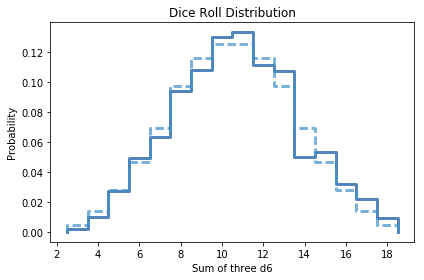

In [40]:
thinkplot.PrePlot(num=2)
thinkplot.Pmf(three)
thinkplot.Pmf(three_exact, linestyle="dashed")
thinkplot.decorate(title="Dice Roll Distribution",
                  xlabel="Sum of three d6",
                  ylabel="Probability")

# Maxima

In [41]:
def RandomMax(dists):
    total = max(dist.Random() for dist in dists)
    return total
    
def SampleMax(dists, n):
    total = MakePmfFromList(RandomMax(dists) for i in range(n))
    return Pmf

In [42]:
def PmfMax(pmf1, pmf2):
    res = Pmf()
    for v1, p1 in pmf1.Items():
        for v2, p2 in pmf2.Items():
            res.Incr(max(v1,v2), p1*p2)
    return res

In [43]:
PmfMax(three, three)

Pmf({3: 4e-06, 4: 0.00014000000000000001, 5: 0.001377, 6: 0.006223, 7: 0.015057000000000001, 8: 0.037224, 9: 0.06458399999999999, 10: 0.10868, 11: 0.146167, 12: 0.149073, 13: 0.16702699999999998, 14: 0.0859, 15: 0.09651300000000002, 16: 0.060992, 17: 0.04311999999999999, 18: 0.017919000000000004})

In [47]:
best_attr_cdf = three_exact.Max(6)
best_attr_pmf = best_attr_cdf.MakePmf()

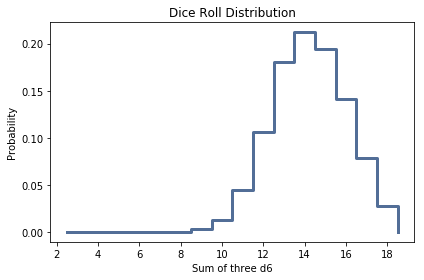

In [48]:
thinkplot.Pmf(best_attr_pmf)
thinkplot.decorate(title="Dice Roll Distribution",
                  xlabel="Sum of three d6",
                  ylabel="Probability")